## 主成分分析

In [41]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plt.style.use('ggplot')

In [42]:
#读数据
data = pd.read_excel('../data/机器学习特征工程_V1.xlsx')

In [43]:
#按照第二问中的分类情况进行分类
try_num = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']
Y = data.drop(try_num,axis=1)
X = data[try_num]
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state=1)

In [44]:
#降维处理函数，用训练集训练模型，用于测试集
def DRPCA(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

In [45]:
#应用降维函数，重新定义dataframe
X_train_pca, X_test_pca ,pca = DRPCA(X_train, X_test,3)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)

component_names = [f"PC{i+1}" for i in range(X_test_pca.shape[1])]
X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
X_train_pca,X_test_pca

(           PC1        PC2       PC3
 0   -19.611367  11.899630 -4.082096
 1   -12.642759  11.816135 -5.476700
 2     2.274959  -4.145381  0.408662
 3     5.348890  -8.066096  1.387420
 4     0.930017  -9.649881  2.107574
 ..         ...        ...       ...
 282 -10.753381  -2.535805  2.363936
 283   3.570832  12.351674  3.621332
 284   3.722390  -3.062968 -0.950195
 285  -9.831784  -4.535744  3.336901
 286  -7.893607   0.225596 -0.334416
 
 [287 rows x 3 columns],
           PC1        PC2       PC3
 0  -11.391982   3.357755 -0.966908
 1   17.830669   1.638528 -0.649763
 2    1.637021  -5.292848 -1.144723
 3   -9.149040  -2.780148  1.766938
 4   17.027857   2.029592  2.464667
 ..        ...        ...       ...
 67  -3.869637  -9.760321  4.303340
 68   5.536262 -13.414410  2.762313
 69   5.730276  -8.930426  1.934831
 70 -18.318808   6.323519 -2.232369
 71 -10.334516   2.223074 -0.795087
 
 [72 rows x 3 columns])

In [46]:
#特征转换
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings.to_excel('../data/特征组合系数.xlsx')

array([<AxesSubplot:xlabel='Component', ylabel='Percentage'>,
       <AxesSubplot:xlabel='Component'>], dtype=object)

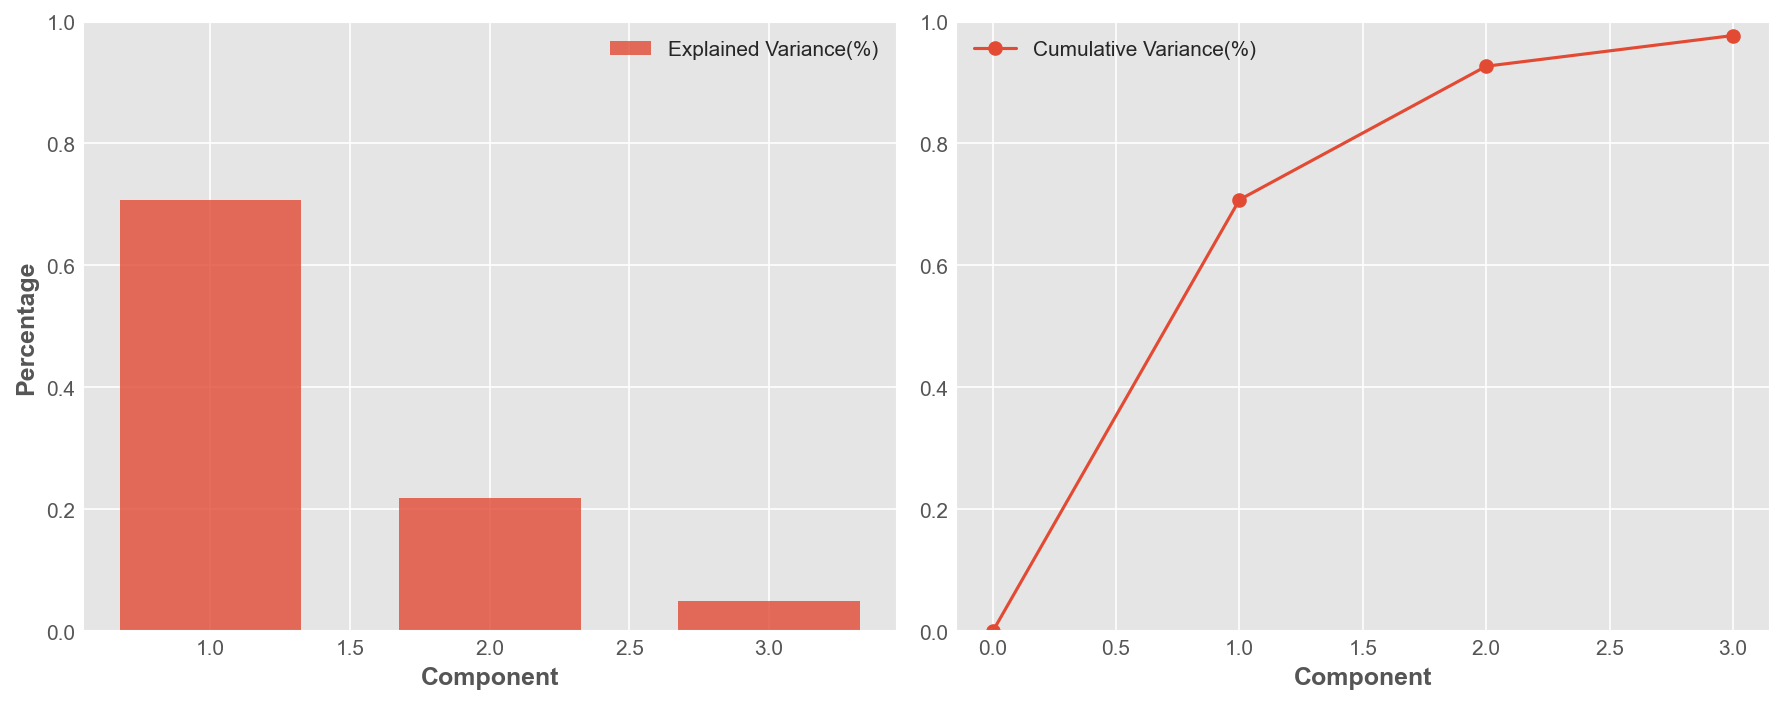

In [47]:
#差异性可视化函数
def plot_variance(pca, width=2, dpi=100):
    
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr,alpha=0.8,label='Explained Variance(%)',width = 0.65)
    axs[0].set(
        xlabel="Component", ylabel="Percentage" , ylim=(0.0, 1.0)
    )
    axs[0].legend(loc = "best")

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-",label = "Cumulative Variance(%)")
    axs[1].set(
        xlabel="Component", ylim=(0.0, 1.0)
    )
    axs[1].legend(loc = "best")
    # Set up figure
    fig.set(figwidth=12, dpi=150)
    return axs

plot_variance(pca)

<Figure size 600x300 with 0 Axes>

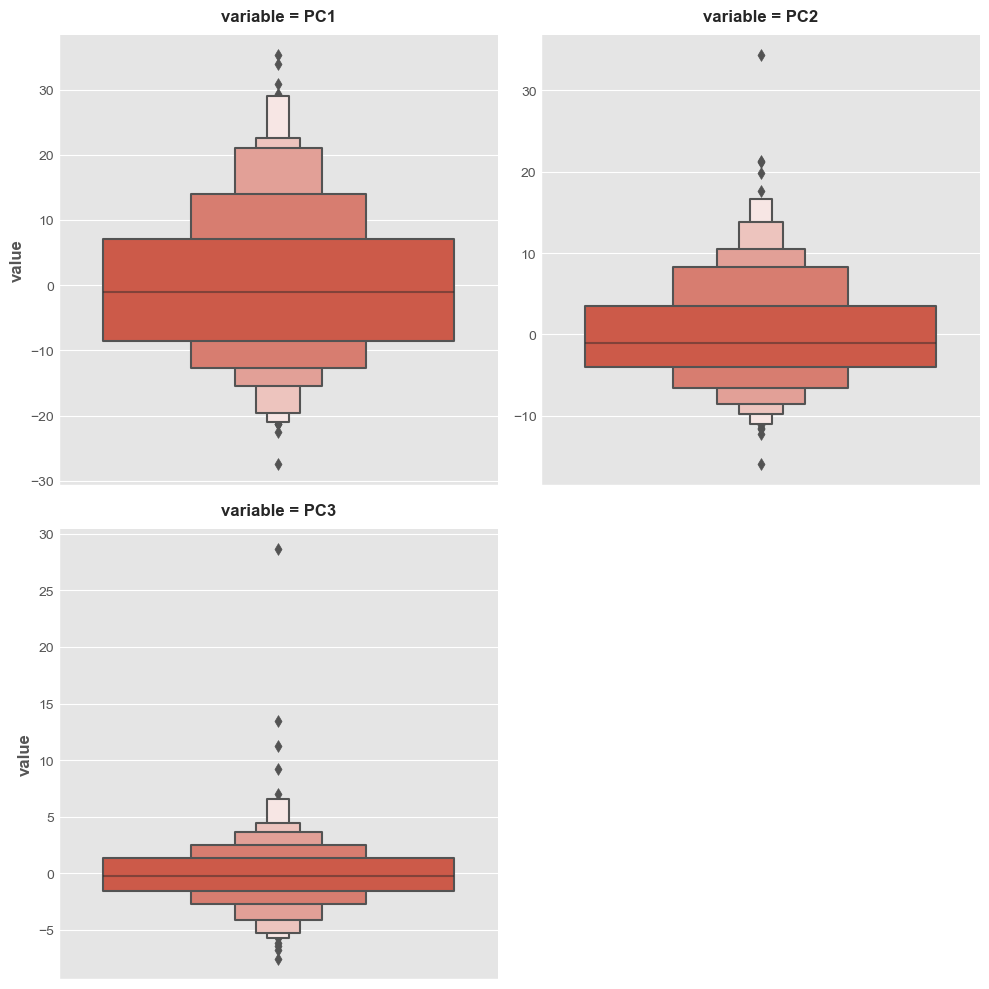

In [48]:
# 数据分布
plt.figure(figsize=(6,3))
sns.catplot(
    y="value",
    col="variable",
    data=X_train_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
)

## 聚类分析

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plt.style.use('ggplot')

def count_nums(labels):
#  统计各个类别的样本数目
    sample_nums = []
    for i in list(set(labels)):
        num = sum(labels==i)
        sample_nums.append(num)
    return sample_nums


### 选取最优聚类数量

[None, None, None]

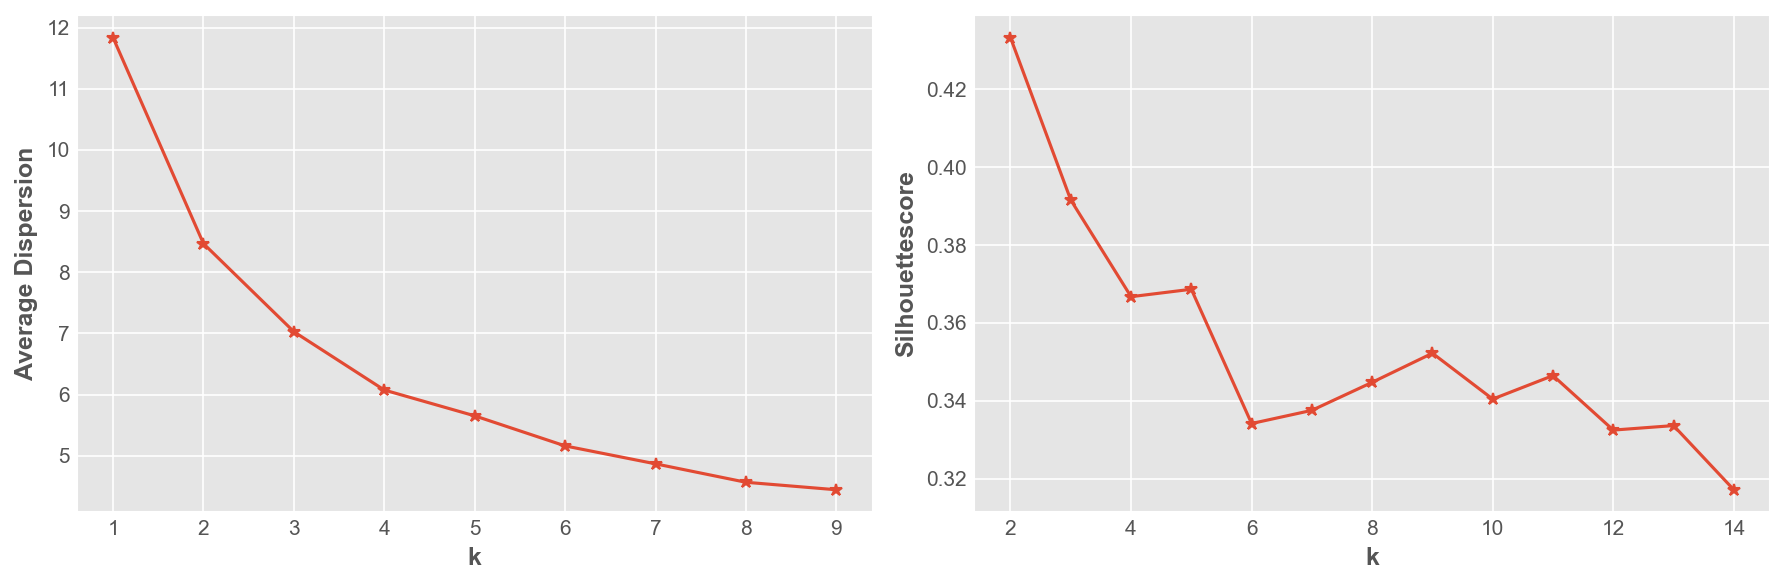

In [50]:
#聚类数量评价 手肘图 斜率骤减处为最优参数
from scipy.spatial.distance import cdist

fig, axs = plt.subplots(1, 2)

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_pca)
    meandistortions.append(sum(np.min(cdist(X_train_pca, kmeans.cluster_centers_, 'euclidean'), axis=1))/X_train_pca.shape[0])

axs[0].plot(K, meandistortions, "*-",linewidth=1.5,linestyle='solid')
axs[0].set(xlabel = 'k',ylabel = 'Average Dispersion')

#聚类数量评价 轮廓系数 越趋近于1代表内聚度和分离度都相对较优，即聚类效果越好
from sklearn.metrics import silhouette_score
silhouettescore=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(X_train_pca)
    score=silhouette_score(X_train_pca,kmeans.labels_)
    silhouettescore.append(score)
axs[1].plot(range(2,15),silhouettescore,"*-",linewidth=1.5,linestyle='solid')
axs[1].set(xlabel = 'k',ylabel ='Silhouettescore')
fig.set(figwidth=12,figheight = 4, dpi=150)
#plt.savefig('../latex/pic/聚类评价系数.png')

### 聚类过程

In [51]:
#聚类过程

kmeans = KMeans(n_clusters=3, random_state=1).fit(X_train_pca)
sample_nums = count_nums(kmeans.labels_)
print('各类数量为：',sample_nums)

各类数量为： [106, 50, 131]


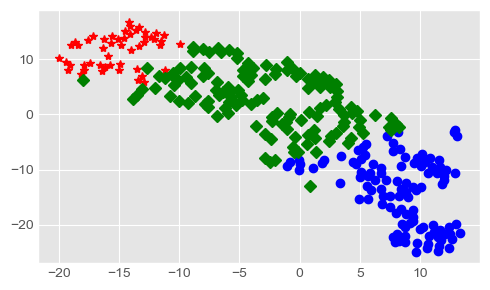

In [52]:
#聚类结果可视化 利用TSNE降维
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne=TSNE(n_components=2,init='random',random_state=177).fit(X_train_pca)
df=pd.DataFrame(tsne.embedding_)
df['labels']=kmeans.labels_
df1=df[df['labels']==0]
df2=df[df['labels']==1]
df3=df[df['labels']==2]
fig=plt.figure(figsize=(5,3))
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')

In [53]:
#融合到原结果 x_train_pca 和x_train
X_train_pca['Clusters'] = kmeans.labels_
X_train['Clusters'] = kmeans.labels_

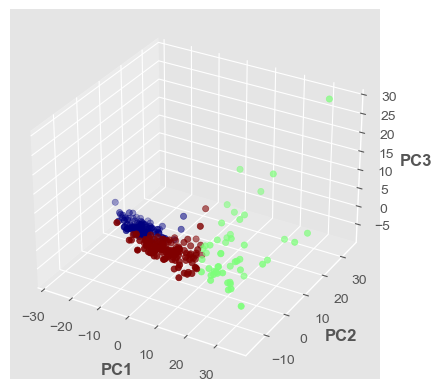

In [54]:
#聚类结果可视化三维
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib auto

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
x = X_train_pca['PC1']
y = X_train_pca['PC2']
z = X_train_pca['PC3']
ax.scatter(x, y, z,c = kmeans.labels_, cmap="jet", marker="o")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [55]:
# 设置绘图函数形式
def plot_Pn(data,cluster):
    cate1 = data[data['Clusters']==cluster]
    cate1_Pn = cate1.sum()/len(cate1)
    del cate1_Pn['Clusters']
    cate1_Pn.index = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','X tries']
    plt.figure(figsize=(5,3))
    sns.barplot(x = cate1_Pn.index,y = cate1_Pn,color = 'royalblue',saturation=0.5)
    plt.ylabel('precentage')
    plt.legend(['cluster = '+str(cluster)])
    #plt.savefig('../latex/pic/cluster'+str(cluster)+'.png',dpi = 150)
    plt.show()
    

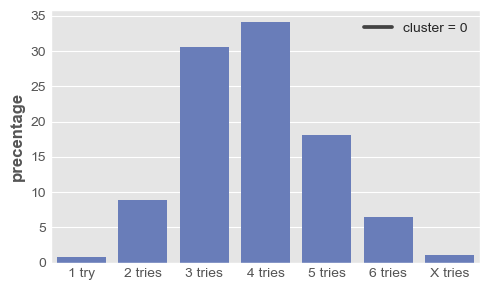

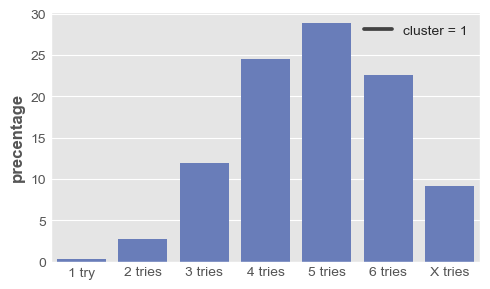

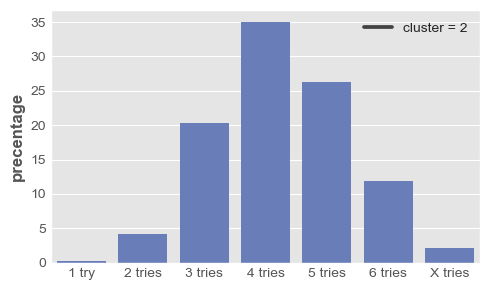

In [56]:
#计算 Pn 的分布，对没类每个次数计算平均值————cluster = 0 --标签简单难度,1 ————标签困难难度,2 ——标签中等难度
for i in range(3):
    plot_Pn(X_train,i)

### 特征分类分析——第二句话

In [57]:
#计算每一类中各特征的平均值
def cal_feature(y_train,cluster):
    data_split = y_train.loc[X_train[X_train['Clusters'] == cluster].index,:]
    mean = data_split.sum()/len(data_split)
    return mean

In [58]:
#使用计算特征平均值方式得到特征列表
split_feature_list = []
for i in range(3):
    split_feature_list.append(cal_feature(y_train,i))

In [59]:
#构建dataframe方便绘画雷达图
cluster_0_df = pd.DataFrame(data = split_feature_list[0]).T
cluster_1_df = pd.DataFrame(data = split_feature_list[1]).T
cluster_2_df = pd.DataFrame(data = split_feature_list[2]).T

In [60]:
#表格连接
cluster = pd.concat([cluster_0_df,cluster_1_df],axis = 0)
cluster = pd.concat([cluster,cluster_2_df],axis = 0)
#重新定义表格行索引
cluster.index = [0,1,2]
cluster

,tag,week,char1,char2,char3,char4,char5,TOTAL,countVowels_nums,countRoot_nums,alpha_nums,char_rep,month,day
0,0.990566,3.113208,10.566038,10.660377,10.330189,11.669811,12.801887,35525.641509,1.764151,0.160377,526.094340,0.075472,6.858491,17.047170
1,1.060000,3.140000,9.140000,10.420000,13.240000,10.140000,12.560000,9818.860000,1.820000,0.280000,432.880000,0.600000,5.980000,16.420000
2,1.045802,2.824427,10.801527,11.267176,10.671756,10.160305,11.557252,13130.671756,1.809160,0.236641,465.770992,0.351145,6.511450,14.847328


In [61]:
#特征归一化代码

'''
cluster_Zscore = cluster.apply(lambda x: (x - x.mean())/math.sqrt(sum((x - x.min())**2 / len(x))))
cluster_Zscore = cluster_Zscore.apply(lambda x:x+1)
cluster_Zscore
'''

'\ncluster_Zscore = cluster.apply(lambda x: (x - x.mean())/math.sqrt(sum((x - x.min())**2 / len(x))))\ncluster_Zscore = cluster_Zscore.apply(lambda x:x+1)\ncluster_Zscore\n'

In [62]:
#将cluster划分为easy,medium和hard,对应标签为0——easy，1——hard，2——middle，定义转化函数
def cluster_to_difficult(cluster):
    if cluster == 0:
        return 'easy'
    elif cluster == 1:
        return 'hard'
    else :
        return 'middle'


category = pd.DataFrame(data = {'cluster':[ cluster_to_difficult(0), cluster_to_difficult(1), cluster_to_difficult(2)]})
category

,cluster
0,easy
1,hard
2,middle


In [63]:
#将标签和特征连接
cluster_feature = pd.concat([category,cluster],axis = 1)
cluster_feature

,cluster,tag,week,char1,char2,char3,char4,char5,TOTAL,countVowels_nums,countRoot_nums,alpha_nums,char_rep,month,day
0,easy,0.990566,3.113208,10.566038,10.660377,10.330189,11.669811,12.801887,35525.641509,1.764151,0.160377,526.094340,0.075472,6.858491,17.047170
1,hard,1.060000,3.140000,9.140000,10.420000,13.240000,10.140000,12.560000,9818.860000,1.820000,0.280000,432.880000,0.600000,5.980000,16.420000
2,middle,1.045802,2.824427,10.801527,11.267176,10.671756,10.160305,11.557252,13130.671756,1.809160,0.236641,465.770992,0.351145,6.511450,14.847328


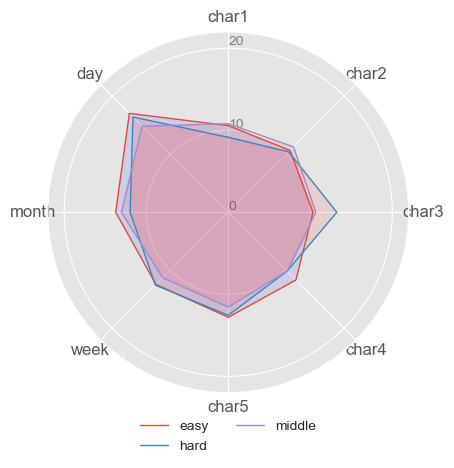

In [64]:
#绘制雷达图
data1 = cluster_feature[['cluster','char1','char2','char3','char4','char5','week','month','day']]


data1['week']  = data1['week']*4
data1['month']  = data1['month']*2

categories=list(data1)[1:]
N = len(categories)

# 分配角度
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,size=12)
 
# 绘制刻度label
ax.set_rlabel_position(0)
plt.yticks([0,10,20], ["0","10","20"], color="grey", size=10)
plt.ylim(0,22)
#变量01
values=data1.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="easy")
ax.fill(angles, values, 'b', alpha=0.1)
#变量02
values=data1.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="hard")
ax.fill(angles, values, 'r', alpha=0.1)
#变量03
values=data1.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="middle")
ax.fill(angles, values, 'r', alpha=0.1)
 
# 图例
plt.legend(loc='lower center',frameon=False,ncol=2,bbox_to_anchor=(0.5, -0.2))
#plt.savefig('../latex/pic/radius1.png',dpi = 200)

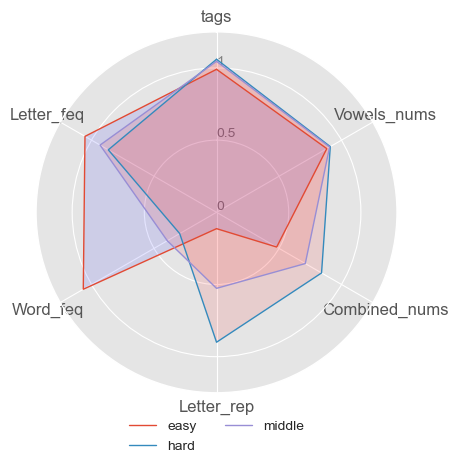

In [65]:
#绘制雷达图
data2 = cluster_feature[['cluster','tag','countVowels_nums','countRoot_nums','char_rep','TOTAL','alpha_nums']]
data2.columns = ['cluster','tags','Vowels_nums','Combined_nums','Letter_rep','Word_feq','Letter_feq']

#数据比例预处理
data2['Word_feq'] = data2['Word_feq']*0.00003
data2['Letter_feq'] = data2['Letter_feq']/500
data2['Vowels_nums']  = data2['Vowels_nums']/2
data2['Combined_nums']  = data2['Combined_nums']*3
data2['Letter_rep']  = data2['Letter_rep']*1.5


categories=list(data2)[1:]
N = len(categories)
# 分配角度
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,size=12)
 
# 绘制刻度label
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1,1.5], ["0","0.5","1","1.5"], color="grey", size=10)
plt.ylim(0,1.25)
#变量01
values=data2.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="easy")
ax.fill(angles, values, 'b', alpha=0.1)
#变量02
values=data2.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="hard")
ax.fill(angles, values, 'r', alpha=0.1)
#变量03
values=data2.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="middle")
ax.fill(angles, values, 'r', alpha=0.1)
 
# 图例
plt.legend(loc='lower center',frameon=False,ncol=2,bbox_to_anchor=(0.5, -0.2))
#plt.savefig('../latex/pic/radius2.png',dpi = 200)

#### 对于单一单词——第三句话

In [66]:
#提取单词ERRIE的特征
ERRIE_featrues = pd.DataFrame(data = {"tag":[1],
"week" :[2],
'char1':[4],
'char2':[4],
'char3':[17],
'char4':[8],
'char5':[4],
'TOTAL':[2272],
'countVowels_nums':[4],
'countRoot_nums':[1],
'alpha_nums':[756],
'char_rep':[2],
'month' : [3],
'day' : [1]
})

ERRIE_tries = pd.DataFrame(data = {'1 try':[1.27532613],
'2 tries': [12.57237897],
'3 tries': [20.97319311],
'4 tries': [29.17336743],
'5 tries': [23.36348532],
'6 tries': [11.84900036],
'7 or more tries (X)': [5.09610018]   
})

In [67]:
word_sample_pca = pca.transform(ERRIE_tries)
word_sample = kmeans.predict(word_sample_pca)
print('单词所属难度为',cluster_to_difficult(word_sample))

单词所属难度为 middle


#### 对于测试集_模型验证——第四句话

In [68]:
#对测试集应用训练集的kmeans模型，得到结果并融合,这是真实标签
test_real_label = kmeans.predict(X_test_pca)

In [69]:
#将七个预测序列放入X_test_pred
X_test_pred = pd.DataFrame()
for i in ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']:
    file_path = '../data/predict/'+ i + 'test_predict.xlsx'
    data = pd.read_excel(file_path)
    X_test_pred[i] = data[0]
X_test_pred


,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2.303630,7.623000,26.478113,32.554747,19.200882,7.851643,2.824271
1,0.252540,3.903798,17.120573,32.253469,26.582748,14.524405,2.290097
2,0.345370,7.406435,32.536615,34.931856,20.363195,15.231149,2.907926
3,0.509231,6.380774,22.334808,32.533810,21.582514,17.051007,2.728875
4,0.000096,1.997462,15.913132,34.374322,26.993440,18.076709,3.496509
...,...,...,...,...,...,...,...
67,0.367932,7.591876,23.602022,34.446187,21.787021,13.290127,2.325896
68,0.086737,2.498445,10.266504,28.332435,29.064450,20.455450,3.592645
69,0.075309,3.687129,19.698430,34.228880,25.901657,13.074842,2.321273
70,0.753586,8.202003,29.338069,33.750125,19.197365,7.063383,2.607131


In [70]:
# 对test_pred 进行pca降维
pca_val = PCA(n_components=3)
X_test_pred_pca = pca_val.fit_transform(X_test_pred)

In [71]:
#对测试数据进行聚类
kmeans_val = KMeans(n_clusters=3, random_state=1).fit(X_test_pred_pca)
test_pred_label = kmeans_val.labels_
X_test_pred['Clusters'] = test_pred_label

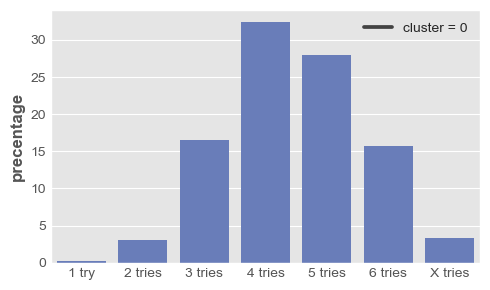

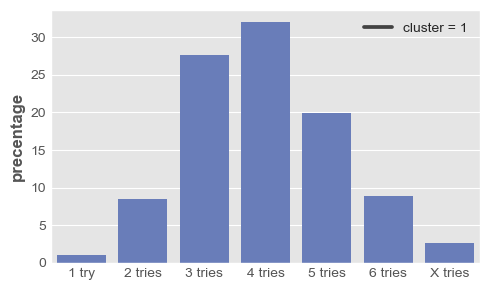

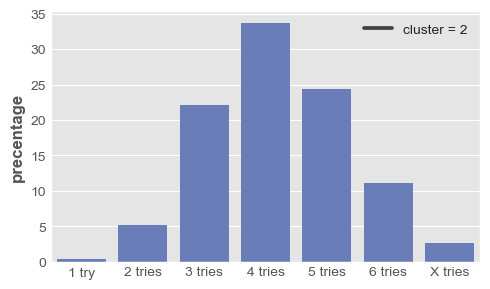

In [72]:
#计算 Pn 的分布，得到困难度，对每类每个次数计算平均值——0——中等，1——困难，2——简单
for i in range(3):
    plot_Pn(X_test_pred,i)

In [73]:
#将cluster划分为easy,medium和hard,对应标签为0——middle，1——hard，2——easy，定义转化函数
def cluster_to_difficult_test(cluster):
    if cluster == 0:
        return 'middle'
    elif cluster == 1:
        return 'hard'
    else :
        return 'easy'

In [74]:
#最终结果对比
compare = pd.DataFrame()
compare['real'] =test_real_label
compare['real'] = compare['real'].apply(lambda x: cluster_to_difficult(x))
compare['val'] = test_pred_label
compare['val'] = compare['val'].apply(lambda x: cluster_to_difficult_test(x))


In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
measure_result = classification_report(compare['real'], compare['val'])
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

        easy       0.37      0.33      0.35        30
        hard       0.00      0.00      0.00        11
      middle       0.53      0.32      0.40        31

    accuracy                           0.28        72
   macro avg       0.30      0.22      0.25        72
weighted avg       0.38      0.28      0.32        72

